<a href="https://colab.research.google.com/github/itssyoma/BigDataBaratov/blob/main/%D0%9B%D0%A03_%D0%9E%D0%B1%D0%B5%D1%81%D0%BF%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3
# Тема: Обеспечение качества данных <br>
**Дисциплина:** «Обработка и анализ больших данных» <br>
**Выполнил:** Студент группы ПИЖ-б-о-22-1, направление подготовки: 09.03.04 «Программная инженерия»<br>
Баратов Семен Григорьевич

# Постановка задачи


**Цель работы:** исследование и обработка данных для повышения их качества.

**Краткое описание:** в лабораторной работе приводится поэтапный план изучения и обработки намеренно не предобработанных данных. Необходимо выполнить все этапы плана и оценить результаты преобразований.

# Данные



В папке [Data/lab3](https://drive.google.com/drive/folders/1437z7m5Ut4WUJOhJg1oZz13dtBpxgFKs?usp=share_link) расположена таблица `monster_com_job_sample.com` с данными о вакансиях. Также эти данные с описанием и примерами обработки можно найти на [kaggle](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data#).

##### **Формат данных**

```
country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
United States of America,US,"",No,jobs.monster.com,"TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:вАҐ Call tracking softwareвАҐ Phone based technical supportвАҐ Problem documentation and communicationвАҐ Remote Desktop Management ToolsвАҐ Respond to customer requestsвАҐ General understanding of LANDeskвАҐ Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?вАҐ TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!вАҐ TeamSoft has been in business since 1996вАҐ TeamSoft's owners are local IT professionals who possess a wealth of experience in application development, business analysis, and project managementвАҐ TeamSoft's Recruiters are knowledgeable, friendly, and ready to help you make your next great career moveвАҐ TeamSoft offers a full benefits suite to all of our W2 consultants, including a 401k plan with a 100% vested 4% dollar for dollar matchвАҐ Our targeted selection process is designed to get to know your strengths and career interests and provide you with the best chance for success in your new positionвАҐ Our longest running consultant has been with us for 16 yearsвАҐ Consultants can participate in our charitable giving committee. To date, TeamSoft's charitable giving committee has donated over $100,000!TeamSoft is owned by local IT professionals. Our team also has deep experience with IT staffing. Our clients understand this and rely on our expertise. That is why TeamSoft is the Madison Area's largest privately owned IT consulting firm, with more than 200 current consultants! With over 50 active clients, TeamSoft will give you the greatest exposure to the widest range of IT careers.Our owners possess a combined 60+ years of IT consulting experience. Our recruiting and Account Management staff are very well-versed in our client markets. We get you. We know you. We know what you do every day. And we know what you deal with on the job.You take your career seriously and so do we. At TeamSoft you are not just a resume or number. Our goal is to create long-term partnerships with each of our consultants, and according to feedback from many of them, we are very good at this. Click HERE to see what our consultants have to say about working with TeamSoft.TeamSoft -- Promote yourself!TeamSoft is an equal employment opportunity employer functioning under an Affirmative Action Plan.",IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702","",http://jobview.monster.com/it-support-technician-job-madison-wi-us-167855963.aspx?mescoid=1500134001001&jobPosition=20,"",IT/Software Development,11d599f229a80023d2f40e7c52cd941e
United States of America,US,"",No,jobs.monster.com,"The Wisconsin State Journal is seeking a flexible and motivated reporter/editor to lead its three-person business desk. WeвАЩre looking for an experienced journalist able to spot trends, be a watchdog and reflect the Madison areaвАЩs vibrant entrepreneurial community. This is a hybrid reporting and editing position that calls for a fleet-footed, multimedia storyteller able to maximize the newspaperвАЩs online presentation while also editing two sections a week. Candidates must have strong news judgment, be well versed in business news and trends and be able to quickly prioritize coverage.At least five yearsвАЩ experience reporting or editing for digital and print platforms desired. To be considered for the position, applicants must apply online.¬†As part of your online application, please attach five samples of your work or links to five recent stories.Wisconsin State Journal, 1901 Fish Hatchery Road, Madison, WI 53713Affirmative Action/Equal Opportunity Employer/Pre-employment drug testing appliesPI94338362Apply Here",Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-editor-job-madison-wi-us-167830105.aspx?mescoid=2700437001001&jobPosition=7,"","",e4cbb126dabf22159aff90223243ff2a
...
```

##### **Описание полей**
 - ```country``` — наименование страны;
 - ```country_code``` — код страны;
 - ```date_added``` — дата размещения вакансии;
 - ```has_expired``` — актуальность вакансии;
 - ```job_board``` — агрегатор вакансий, с которого собраны данные;
 - ```job_description``` — описание вакансии;
 - ```job_title``` — наименование должности;
 - ```job_type``` — вид занятости;
 - ```location``` — метоположение организации;
 - ```organization``` — наименование организации;
 - ```page_url``` — ссылка на страницу с вакансией;
 - ```salary``` — заработная плата;
 - ```sector``` — сфера деятельности;
 - ```uniq_id``` — уникальный идентификатор записи о вакансии.

# Понимание данных

In [ ]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns

В датасете есть несколько столбцов, в каждой ячейке которых записано одно и то же значение. Есть столбцы, в которых формат записи значений не стандартизирован. А есть такие, где указана информация, не соответствующая названию столбца.

**Первый этап изучения данных** – понять, какие основные проблемы предстоит решить для каждого из столбцов. Для этого загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
df = pd.read_csv('monster_com_job_sample.csv')

print("Размер:", df.shape)
display(df.sample(5, random_state=42))
display(df.head(3))


Размер: (22000, 14)


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
13035,United States of America,US,NaN,No,jobs.monster.com,The QC Lead position requires an understanding...,Quality Control Lead Job in Santa Cruz,Full Time,"Santa Cruz, CA 95060",Manufacturing - Other,http://jobview.monster.com/Quality-Control-Lea...,NaN,Experienced (Non-Manager),c44af81ceb38d2b6fe00baf15d0dffe6
3115,United States of America,US,NaN,No,jobs.monster.com,JOB DESCRIPTION ...,Case Manager Job in Sunset Point,Full Time Employee,"Sunset Point, FL 33765",Healthcare Services,http://jobview.monster.com/Case-Manager-Job-Su...,NaN,Medical/Health,217600308ffc96a1a81eb8afba5ee522
8732,United States of America,US,NaN,No,jobs.monster.com,POSITION PURPOSE The Senior Manager Foundation...,Sr Manager,Full Time,"Atlanta, GA 30301",Retail,http://jobview.monster.com/sr-manager-foundati...,NaN,Manager (Manager/Supervisor of Staff),ef7db9ba10dd8bf7754ecf6ddd09a5aa
7591,United States of America,US,NaN,No,jobs.monster.com,GroundskeeperWest Knox Apart need a F/T Ground...,Groundskeeper Job in Knoxville,Full Time,"Knoxville, TN 37923",NaN,http://jobview.monster.com/Groundskeeper-Job-K...,NaN,NaN,cd3adb94fc647ca5ea3af731dc1da065
221,United States of America,US,NaN,No,jobs.monster.com,Combined Insurance is seeking Sales Agents to ...,Sales Agent Job in Knoxville,Full Time,"Knoxville, TN",Insurance,http://jobview.monster.com/Sales-Agent-Job-Kno...,NaN,NaN,ec59e3f419b851259632b757183d7365


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.


Название столбца | Тип данных | Проблемы
--- | --- | ---
```country``` |
```country_code``` |
```date_added``` |
```has_expired``` |
```job_board``` |
```job_description``` |
```job_title``` |
```job_type``` |
```location``` |
```organization``` |
```page_url``` |
```salary``` |
```sector``` |
```uniq_id``` |

### Оценка пустых ячеек в датасете

Выясните, в каких столбцах, строках и в каком количестве отсутствуют данные:
1. С помощью модуля `pandas` составьте таблицу, где каждому названию столбца будет сопоставлено общее количество ячеек и количество пустых ячеек.
2. Подсчитайте количество строк датасета, в которых пустыми являются более 75% ячеек.
3. Визуализируйте число пропусков в датасете с помощью модуля, построив столбчатую диаграмму. Для удобства можно воспользоваться модулем `missingno`.


In [ ]:
info = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str).values,
    "example": [df[c].dropna().astype(str).head(1).values[0] if df[c].notna().any() else "" for c in df.columns],
    "n_unique": [df[c].nunique(dropna=False) for c in df.columns],
    "missing": [df[c].isna().sum() for c in df.columns]
})
display(info)


,column,dtype,example,n_unique,missing
0,country,object,United States of America,1,0
1,country_code,object,US,1,0
2,date_added,object,5/10/2016,79,21878
3,has_expired,object,No,1,0
4,job_board,object,jobs.monster.com,1,0
5,job_description,object,TeamSoft is seeing an IT Support Specialist to...,18744,0
6,job_title,object,IT Support Technician Job in Madison,18759,0
7,job_type,object,Full Time Employee,40,1628
8,location,object,"Madison, WI 53702",8423,0
9,organization,object,Printing and Publishing,739,6867


Проверьте, как изменится размер датасета, если принять решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
before = df.shape
df_dropna = df.dropna()
after = df_dropna.shape

print("До удаления строк с пропусками:", before)
print("После dropna (удалить все строки с любыми NaN):", after)
print("Доля оставшихся строк: {:.2f}%".format(after[0] / before[0] * 100))


До удаления строк с пропусками: (22000, 14)
После dropna (удалить все строки с любыми NaN): (5, 14)
Доля оставшихся строк: 0.02%


### Первичная оценка данных в столбцах

Изучите данные в столбцах датасета, ответив на следующие вопросы:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли такие значения, которые встречаются более чем в одном столбце?
3. Есть ли столбцы, данные в которых не соответствуют названию столбца?

In [ ]:
# 1) столбцы с одним значением
single_value_cols = [c for c in df.columns if df[c].nunique(dropna=False) == 1]
print("Столбцы с одним значением:", single_value_cols)

# 2) значения, встречающиеся в нескольких столбцах (быстрый эвристический поиск)
# Берём самые частые значения и смотрим пересечения
top_values = {}
for c in df.columns:
    vc = df[c].astype(str).value_counts().head(5)
    top_values[c] = set(vc.index)

common_values = {}
cols = list(df.columns)
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        inter = top_values[cols[i]].intersection(top_values[cols[j]])
        inter = {v for v in inter if v not in ["nan", "", " "]}
        if inter:
            common_values[(cols[i], cols[j])] = list(inter)[:5]

print("Примеры совпадающих значений между столбцами (топовые пересечения):")
for k, v in list(common_values.items())[:10]:
    print(k, "->", v)

# 3) несоответствие данных названию (простая проверка: url не url, salary содержит буквы, country_code не 2 буквы)
bad_country_code = df['country_code'].dropna().astype(str).str.len().ne(2).sum()
bad_url = df['page_url'].dropna().astype(str).str.contains(r'^https?://', regex=True).eq(False).sum()
print("country_code не длины 2 (пример несоответствия):", bad_country_code)
print("page_url не похож на url:", bad_url)


Столбцы с одним значением: ['country', 'country_code', 'has_expired', 'job_board']
Примеры совпадающих значений между столбцами (топовые пересечения):
country_code не длины 2 (пример несоответствия): 0
page_url не похож на url: 0


### Дублирование данных

Для поиска дублирующихся строк выполните следующие действия:
1. В таблице есть столбец `uniq_id`, значения которого, как сказано в описании данных, являются уникальными идентификаторами записей. Проверьте, действительно ли в этом столбце все значения различны.
2. Проверьте, есть ли в таблице другие столбцы, значения которых в каждой строке различны.
3. Если игнорировать столбцы, где все значения различны, найдутся ли такие строки, для которых значения по всем остальным столбцам будут совпадать?

Оцените результаты поиска дубликатов.

In [ ]:
# 1) уникален ли uniq_id
uniq_total = df['uniq_id'].shape[0]
uniq_unique = df['uniq_id'].nunique(dropna=False)
print("uniq_id всего:", uniq_total, "уникальных:", uniq_unique)
print("Дубликатов uniq_id:", uniq_total - uniq_unique)

# 2) есть ли другие столбцы, где все значения уникальны
all_unique_cols = [c for c in df.columns if df[c].nunique(dropna=False) == len(df)]
print("Столбцы, где все значения уникальны:", all_unique_cols)

# 3) дубликаты по остальным столбцам
cols_for_dup = [c for c in df.columns if c not in all_unique_cols]
dup_mask = df.duplicated(subset=cols_for_dup, keep=False)
dup_count = dup_mask.sum()
print("Строк, которые дублируются по НЕ-уникальным столбцам:", dup_count)

if dup_count > 0:
    display(df.loc[dup_mask, cols_for_dup].head(10))


uniq_id всего: 22000 уникальных: 22000
Дубликатов uniq_id: 0
Столбцы, где все значения уникальны: ['page_url', 'uniq_id']
Строк, которые дублируются по НЕ-уникальным столбцам: 2078


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,salary,sector
17,United States of America,US,NaN,No,jobs.monster.com,We are currently seeking ambitious and persona...,Pest Control Technician – Field Service Rep (E...,"Full Time, Employee","Denver, CO",Accounting and Auditing Services,NaN,Installation/Maintenance/Repair
27,United States of America,US,NaN,No,jobs.monster.com,The Training Department plays a crucial role i...,Traveling Customer Training Professional Job i...,Full Time Employee,"Houston, TX 77040",AllComputer SoftwareComputer/IT Services,NaN,Customer Support/Client Care
47,United States of America,US,NaN,No,jobs.monster.com,The Project Manager reports directly to the Co...,Project Manager ( Z ) Job in Houston,Full Time Employee,"Houston, TX 77034",NaN,NaN,Business/Strategic Management
56,United States of America,US,NaN,No,jobs.monster.com,DescriptionIf your goal is to begin a fantasti...,CASHIER Job in Houston,Full Time,"Houston, TX",Retail,NaN,Experienced (Non-Manager)
95,United States of America,US,NaN,No,jobs.monster.com,The Judge Group is looking for a Scrum Master ...,Scrum Master Job in Denver,"Full Time, Employee","Denver, CO",Computer/IT Services,NaN,IT/Software Development
96,United States of America,US,NaN,No,jobs.monster.com,Financial Advisor Northwestern MutualOur finan...,Financial Advisor / Financial Sales Representa...,Full Time Employee,"Houston, TX",Banking,NaN,Sales/Retail/Business Development
114,United States of America,US,NaN,No,jobs.monster.com,Event Promotions: Marketing / Advertising / Pu...,Event Promotions: Marketing / Advertising / Pu...,Full Time Employee,"Houston, TX 77057",RetailAdvertising and PR ServicesBusiness Serv...,NaN,Marketing/Product
165,United States of America,US,NaN,No,jobs.monster.com,The Enrollment Agent I (EA I) supports Enrollm...,Enrollment Agent I* (-) Job in Denver,"Full Time, Employee","Denver, CO","Computer Software, Computer/IT Services",NaN,Customer Support/Client Care
212,United States of America,US,NaN,No,jobs.monster.com,Job Description : Want more than just a job? J...,Associate,"Full Time , Employee",Job Description : Want more than just a job? J...,Retail,NaN,Experienced (Non-Manager)
221,United States of America,US,NaN,No,jobs.monster.com,Combined Insurance is seeking Sales Agents to ...,Sales Agent Job in Knoxville,Full Time,"Knoxville, TN",Insurance,NaN,NaN


# Практические задания

В этом разделе необходимо обработать значения в трех столбцах датасета: `location`, `salary` и `job_type`. Цель обработки – стандартизировать данные в каждом из столбцов так, чтобы их можно было анализировать.

### Задание 1

В задании 1 необходимо провести обработку столбца `location`.

#### Задание 1.1

В столбце `location` представлена информация о местоположении организации, в которой открыта вакансия. Каждое значение столбца `location` содержит информацию о городе, коде штата и почтовом индексе.

Однако не в каждой строке есть все три характеристики местоположения, а также могут встречаться разные комбинации из них, записанные в виде строки в произвольном порядке и с разными разделителями.

Например, может быть указан только код штата, только название города или только индекс. Могут быть указаны любые две характеристики из трех.

**Формулировка задания:**
1. Определите, какие форматы встречаются.
2. Напишите одно или несколько регулярных выражений для поиска выявленных форматов.
3. Визуализируйте количество найденных форматов на столбчатой или круговой диаграмме. Также покажите на ней количество строк, в которых формат определить не удалось. Какие форматы встречаются чаще всего?

Ознакомиться с теоретическим материалом по работе с регулярными выражениями можно [по ссылке](https://colab.research.google.com/drive/1eFHdmt9OROLEDJRNc2wNmz0gpE1O3sKU?usp=sharing).

,format,count
0,city_state_zip,11583
1,city_state,7260
2,unknown,2652
3,zip_only,254
4,state_only,230
5,state_zip,21


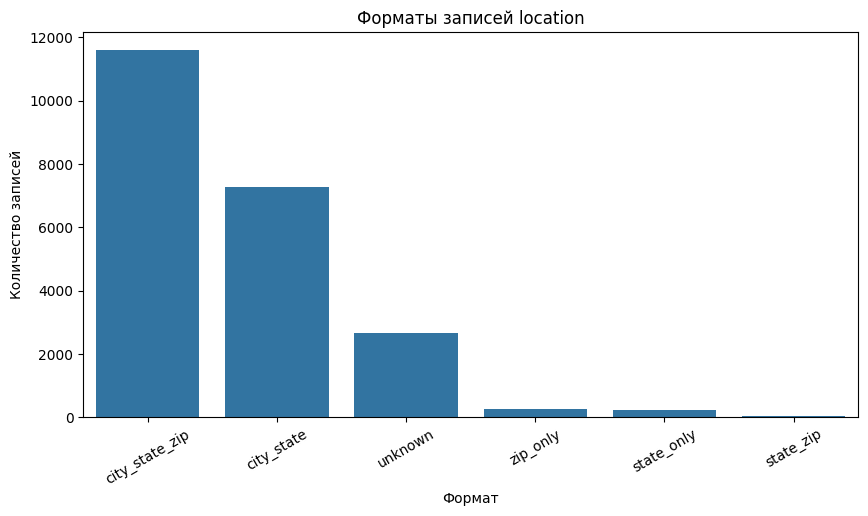

In [ ]:
loc = df['location'].astype(str).fillna("")

# Основные паттерны:
# 1) City, ST ZIP  (Madison, WI 53702)
p_city_st_zip = re.compile(r'^(?P<city>.*?)[,\s]+(?P<state>[A-Z]{2})\s+(?P<zip>\d{5})(?:-\d{4})?$')

# 2) City, ST (Madison, WI)
p_city_st = re.compile(r'^(?P<city>.*?)[,\s]+(?P<state>[A-Z]{2})$')

# 3) ST ZIP (WI 53702)
p_st_zip = re.compile(r'^(?P<state>[A-Z]{2})\s+(?P<zip>\d{5})(?:-\d{4})?$')

# 4) ZIP only (53702)
p_zip = re.compile(r'^(?P<zip>\d{5})(?:-\d{4})?$')

# 5) ST only (WI)
p_st = re.compile(r'^(?P<state>[A-Z]{2})$')

def detect_loc_format(s):
    s = str(s).strip()
    if s in ["", "nan", "None"]:
        return "missing"
    if p_city_st_zip.match(s): return "city_state_zip"
    if p_city_st.match(s): return "city_state"
    if p_st_zip.match(s): return "state_zip"
    if p_zip.match(s): return "zip_only"
    if p_st.match(s): return "state_only"
    return "unknown"

df['loc_format'] = df['location'].apply(detect_loc_format)

fmt_counts = df['loc_format'].value_counts().reset_index()
fmt_counts.columns = ['format', 'count']
display(fmt_counts)

plt.figure(figsize=(10,5))
sns.barplot(data=fmt_counts, x='format', y='count')
plt.title("Форматы записей location")
plt.xlabel("Формат")
plt.ylabel("Количество записей")
plt.xticks(rotation=30)
plt.show()


#### Задание 1.2

В большей части строк удалось извлечь данные из ячейки столбца `location`, но остались и такие, где это не получилось. Вынесите в отдельный датасет записи, в которых не удалось определить формат записи информации о местоположении.

Над оставшимися строками проведите следующие преобразования:
1. Данные о местоположении разделите на 3 столбца: город, код штата, почтовый индекс.
2. Так как значения в столбце `почтовый индекс` являются пятизначными числами, преобразуйте их в целочисленный формат.

In [ ]:
unknown_loc = df[df['loc_format'] == 'unknown'].copy()
print("Строк с неизвестным форматом location:", unknown_loc.shape[0])
display(unknown_loc[['location']].sample(min(10, len(unknown_loc)), random_state=42))

# Создаём новые столбцы для всех строк
df['city'] = np.nan
df['state'] = np.nan
df['zip'] = np.nan

def extract_loc(s):
    s = str(s).strip()
    if s in ["", "nan", "None"]:
        return (np.nan, np.nan, np.nan)

    m = p_city_st_zip.match(s)
    if m:
        return (m.group('city').strip().strip(','), m.group('state'), m.group('zip'))

    m = p_city_st.match(s)
    if m:
        return (m.group('city').strip().strip(','), m.group('state'), np.nan)

    m = p_st_zip.match(s)
    if m:
        return (np.nan, m.group('state'), m.group('zip'))

    m = p_zip.match(s)
    if m:
        return (np.nan, np.nan, m.group('zip'))

    m = p_st.match(s)
    if m:
        return (np.nan, m.group('state'), np.nan)

    return (np.nan, np.nan, np.nan)

df[['city','state','zip']] = df['location'].apply(lambda x: pd.Series(extract_loc(x)))

df['zip'] = pd.to_numeric(df['zip'], errors='coerce').astype('Int64')

display(df[['location','city','state','zip','loc_format']].sample(10, random_state=1))


Строк с неизвестным форматом location: 2652


,location
20395,Monitor Technician Full Time Nights (EKG Cert....
1485,"QA, Selenium WebDriver Automation Responsibili..."
8371,"When you choose Toll Brothers, you enjoy all t..."
15868,Job Description Job #: 658160DSP DeveloperApe...
8176,"Description:As Director, Government Sales Solu..."
20505,Registered Nurse (Full-time nights) Kindred Ho...
2357,Contact name Emma Pelham
15846,Certified Nursing Assistant - CNA - Part-Time ...
18364,Auto Parts Delivery Drivers / Couriers Partsf...
2647,Missoula 59808


,location,city,state,zip,loc_format
12633,"Billerica, MA",Billerica,MA,<NA>,city_state
7583,Job Description : Position: Assistant Store Ma...,NaN,NaN,<NA>,unknown
6709,"Middleton, WI",Middleton,WI,<NA>,city_state
7540,"Las Vegas, NV 89144",Las Vegas,NV,89144,city_state_zip
15125,Contact name Human Resources Phone 757-222-600...,Contact name Human Resources Phone 757-222-600...,VA,23661,city_state_zip
10697,"Camphill, PA",Camphill,PA,<NA>,city_state
12394,Contact name Select Staffing,NaN,NaN,<NA>,unknown
7424,TN 37923,NaN,TN,37923,state_zip
21715,"Cincinnati, OH 45211",Cincinnati,OH,45211,city_state_zip
16419,"Columbus, OH",Columbus,OH,<NA>,city_state


Рассмотрите отложенную часть выборки (ту, где не удалось данные из столбца `location` разделить на три поля) и сделайте выводы о возможности извлечь из данных город, код штата и почтовый индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [ ]:
unknown_loc = df[df['loc_format'] == 'unknown'].copy()

state_any = re.compile(r'\b([A-Z]{2})\b')
zip_any = re.compile(r'\b(\d{5})(?:-\d{4})?\b')

def salvage_loc(s):
    s0 = str(s)
    if s0.strip() in ["", "nan", "None"]:
        return (np.nan, np.nan, np.nan)

    st = None
    zp = None

    m = zip_any.search(s0)
    if m: zp = m.group(1)

    m = state_any.search(s0)
    if m: st = m.group(1)

    # город: попробуем убрать zip и state и знаки пунктуации
    city = s0
    if zp: city = re.sub(zip_any, '', city)
    if st: city = re.sub(r'\b' + re.escape(st) + r'\b', '', city)
    city = re.sub(r'[,;/\-]+', ' ', city)
    city = re.sub(r'\s+', ' ', city).strip()

    if city == "" or city.lower() == "nan":
        city = np.nan

    return (city, st, zp)

# заполняем только там, где пусто
mask_unknown = df['loc_format'] == 'unknown'
salvaged = df.loc[mask_unknown, 'location'].apply(lambda x: pd.Series(salvage_loc(x)))
salvaged.columns = ['city_s','state_s','zip_s']

df.loc[mask_unknown, 'city'] = df.loc[mask_unknown, 'city'].fillna(salvaged['city_s'])
df.loc[mask_unknown, 'state'] = df.loc[mask_unknown, 'state'].fillna(salvaged['state_s'])
df.loc[mask_unknown, 'zip'] = df.loc[mask_unknown, 'zip'].fillna(pd.to_numeric(salvaged['zip_s'], errors='coerce').astype('Int64'))

print("После salvage: пустых city/state/zip среди unknown стало:")
print("city:", df.loc[mask_unknown, 'city'].isna().mean())
print("state:", df.loc[mask_unknown, 'state'].isna().mean())
print("zip:", df.loc[mask_unknown, 'zip'].isna().mean())

display(df.loc[mask_unknown, ['location','city','state','zip']].sample(min(10, df.loc[mask_unknown].shape[0]), random_state=7))


После salvage: пустых city/state/zip среди unknown стало:
city: 0.0
state: 0.5780542986425339
zip: 0.7745098039215687


,location,city,state,zip
20395,Monitor Technician Full Time Nights (EKG Cert....,Monitor Technician Full Time Nights (EKG Cert....,IT,<NA>
4360,React JS / Javascript Engineer - Will Learn Re...,React Javascript Engineer Will Learn React JSL...,JS,<NA>
1865,Contact name Noreen Khafagi,Contact name Noreen Khafagi,None,<NA>
20162,Contact name Caitlin Brink,Contact name Caitlin Brink,None,<NA>
1522,Contact name Brendan Collins,Contact name Brendan Collins,None,<NA>
18476,Contact name Michael Turner Phone 781-270-7020...,Contact name Michael Turner Phone 781 270 7020...,None,<NA>
11777,Customer Success Manager Job in San Mateo 9440...,Customer Success Manager Job in San Mateo Cali...,US,94402
2962,North Little Rock 72199,North Little Rock,None,72199
15771,Certified Nursing Assistant - CNA - Per-Diem -...,Certified Nursing Assistant CNA Per Diem Day S...,MA,<NA>
2243,Contact name Sam Velasquez,Contact name Sam Velasquez,None,<NA>


### Задание 2

В задании 2 необходимо провести обработку столбца `salary`.

#### Задание 2.1

В столбце `salary`, как и в `location`, данные не стандатизированы. В нем в основном можно встретить записи в следующих форматах:

* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

Основные проблемы, которые стоит учесть при обработке форматов:
- В каждом из форматов может быть или не быть знака доллара.
- Может отсутствовать информация о периоде, за который указывается зарплата (`/hour` или `/year` в примерах).
- Зарплата может быть указана за месяц (`/month`) и за неделю (`/week`).
- В начале, конце и середине некоторых строк есть лишние пробелы, которые не стоит учитывать.

**Задание:**
1. Определите весь перечень встречающихся форматов и напишите одно или несколько регулярных выражений для их поиска.
2. Покажите на столбчатой диаграмме количество записей, содержащих каждый из форматов. Сделайте выводы.

,format,count
0,missing,18557
1,range_with_period,2380
2,other_number,494
3,unknown,330
4,single_plus_with_period,139
5,upto,100


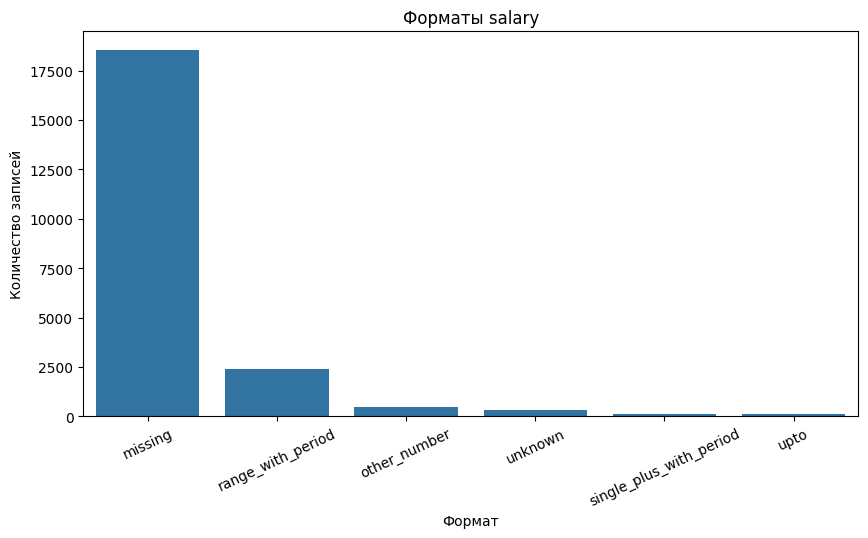

In [ ]:
sal = df['salary'].astype(str).fillna("").str.strip()

# Паттерны (приближённо под основные варианты)
p_range_period = re.compile(r'^\$?\s*[\d,]+(?:\.\d+)?\s*-\s*\$?\s*[\d,]+(?:\.\d+)?\s*(?:\$)?\s*/\s*(hour|year|month|week)\s*$', re.I)
p_single_period = re.compile(r'^\$?\s*[\d,]+(?:\.\d+)?\s*(?:\$)?\s*/\s*(hour|year|month|week)\s*$', re.I)
p_single_plus_period = re.compile(r'^\$?\s*[\d,]+(?:\.\d+)?\+\s*(?:\$)?\s*/\s*(hour|year|month|week)\s*$', re.I)
p_upto = re.compile(r'^\s*Up to\s*\$?\s*[\d,]+(?:\.\d+)?\s*(?:\$)?\s*(?:/\s*(hour|year|month|week))?\s*$', re.I)
p_other_num = re.compile(r'.*\$?\s*[\d,]+(?:\.\d+)?\s*.*')  # есть число, но формат не понятен

def detect_salary_format(s):
    s = str(s).strip()
    if s in ["", "nan", "None"]:
        return "missing"
    if p_range_period.match(s): return "range_with_period"
    if p_single_plus_period.match(s): return "single_plus_with_period"
    if p_single_period.match(s): return "single_with_period"
    if p_upto.match(s): return "upto"
    if p_other_num.match(s): return "other_number"
    return "unknown"

df['salary_format'] = df['salary'].apply(detect_salary_format)

sc = df['salary_format'].value_counts().reset_index()
sc.columns = ['format','count']
display(sc)

plt.figure(figsize=(10,5))
sns.barplot(data=sc, x='format', y='count')
plt.title("Форматы salary")
plt.xlabel("Формат")
plt.ylabel("Количество записей")
plt.xticks(rotation=25)
plt.show()


#### Задание 2.2

1. Разделите столбец `salary` зарплаты три: `минимальная граница зарплаты`, `максимальная граница зарплаты`, `период`. Если значение суммы указано только одно, считайте, что это минимальная зарплата. Значение суммы в обоих столбцах преобразуйте в формат `float`.
2. Покажите на столбчатой диаграмме с группировкой среднюю и медианную минимальную зарплату в каждом периоде. Сделайте выводы.

,salary,salary_min,salary_max,salary_period
2804,NaN,NaN,NaN,NaN
5245,NaN,NaN,NaN,NaN
15875,"120,000.00 - 130,000.00 $ /year",120000.0,130000.0,year
19501,NaN,NaN,NaN,NaN
17717,NaN,NaN,NaN,NaN
9710,NaN,NaN,NaN,NaN
16289,NaN,NaN,NaN,NaN
2028,NaN,NaN,NaN,NaN
9821,NaN,NaN,NaN,NaN
12206,"85,000.00 - 120,000.00 $ /year",85000.0,120000.0,year


,salary_period,mean,median,n
0,hour,202.189231,15.66,1053
1,month,6113.934375,4902.61,16
2,week,662.400000,600.00,5
3,year,59980.174730,60000.00,1446


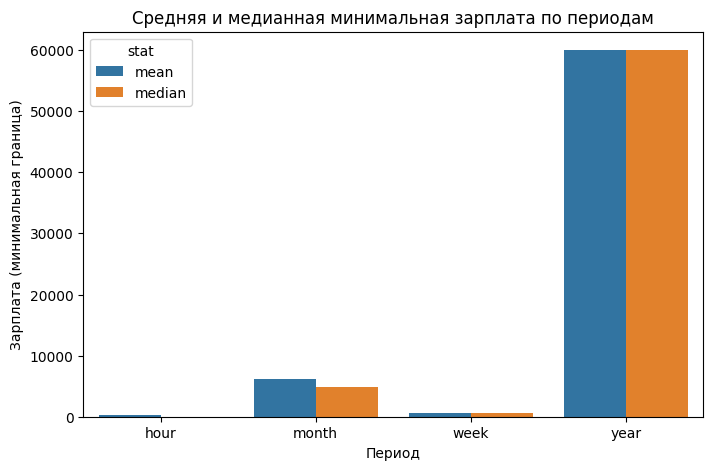

In [ ]:
period_re = re.compile(r'/\s*(hour|year|month|week)\s*$', re.I)

def parse_money(x):
    x = str(x)
    x = x.replace(',', '')
    return float(x)

def parse_salary(s):
    s0 = str(s).strip()
    if s0 in ["", "nan", "None"]:
        return (np.nan, np.nan, np.nan)

    s0 = re.sub(r'\s+', ' ', s0)  # лишние пробелы
    # период
    m = period_re.search(s0)
    period = m.group(1).lower() if m else np.nan

    # Up to ...
    if re.match(r'(?i)^up to', s0):
        # Changed re.findall regex here to capture valid numbers only
        nums = re.findall(r'\d+(?:,\d+)*(?:\.\d+)?', s0)
        if nums:
            mn = parse_money(nums[0])
            return (mn, np.nan, period)

    # диапазон a - b
    if '-' in s0:
        # Changed re.findall regex here to capture valid numbers only
        nums = re.findall(r'\d+(?:,\d+)*(?:\.\d+)?', s0)
        if len(nums) >= 2:
            mn = parse_money(nums[0])
            mx = parse_money(nums[1])
            return (mn, mx, period)

    # одно число (+ может быть)
    # Changed re.findall regex here to capture valid numbers only
    nums = re.findall(r'\d+(?:,\d+)*(?:\.\d+)?', s0)
    if len(nums) >= 1:
        mn = parse_money(nums[0])
        mx = np.nan
        return (mn, mx, period)

    return (np.nan, np.nan, period)

df[['salary_min','salary_max','salary_period']] = df['salary'].apply(lambda x: pd.Series(parse_salary(x)))
df['salary_min'] = df['salary_min'].astype(float)
df['salary_max'] = df['salary_max'].astype(float)

display(df[['salary','salary_min','salary_max','salary_period']].sample(10, random_state=10))

# Группировка: средняя и медианная МИНИМАЛЬНАЯ зарплата по периодам
sal_stats = (
    df.dropna(subset=['salary_min','salary_period'])
      .groupby('salary_period')['salary_min']
      .agg(mean='mean', median='median', n='size')
      .reset_index()
)

display(sal_stats)

# барплот "mean vs median" в одном графике (через melt)
plot_df = sal_stats.melt(id_vars='salary_period', value_vars=['mean','median'], var_name='stat', value_name='value')

plt.figure(figsize=(8,5))
sns.barplot(data=plot_df, x='salary_period', y='value', hue='stat')
plt.title("Средняя и медианная минимальная зарплата по периодам")
plt.xlabel("Период")
plt.ylabel("Зарплата (минимальная граница)")
plt.show()


#### Задание 2.3

Как было отмечено в задании 2.1, период, за который указывается зарплата, может отсутствовать. Восполните этот пробел в данных следующим образом:

1. Определите диапазон изменения (разброс) значений денежной суммы за каждый из встречающихся в данных периодов. Постройте гистограмму для каждого периода.
2. Определите, к среднему значению за какой период ближе всего сумма, у которой период не указан. Укажите для найденный период. В спорных случаях, где сумма одинаково близка к нескольким диапазонам, не выбирайте ничего.

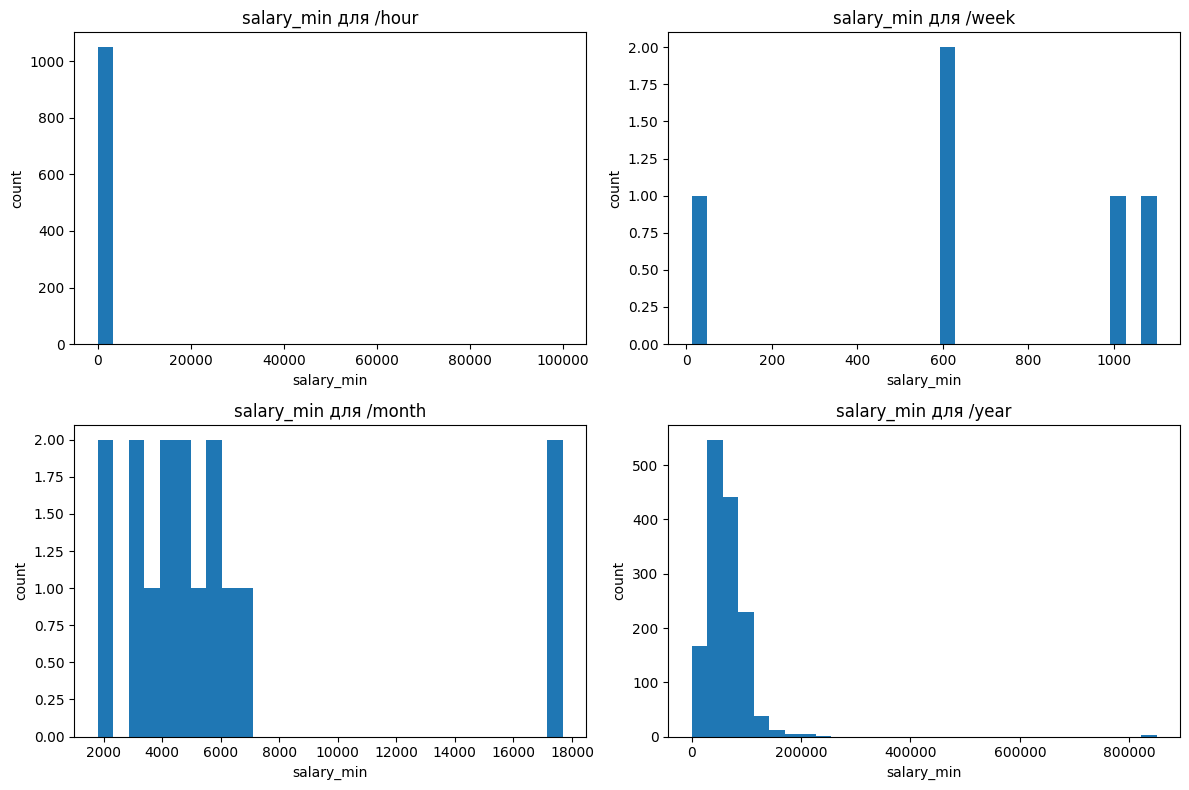

Средние salary_min по периодам: {'hour': 202.18923076923076, 'month': 6113.934375, 'week': 662.4, 'year': 59980.174730290455}
Сколько периодов удалось восстановить: 561


,salary,salary_min,salary_period_inferred
42,Up to $32000.00,32000.00,month
61,"45,000.00 - 100,000.00 $ /yearBonus, Benefits,...",45000.00,year
64,"40,000.00 - 50,000.00 $ /yearsalary",40000.00,year
68,13.75 - 16.75 $ /hourYear End Bonus,13.75,hour
92,"bonus, 401K matching, medical, vacation",401.00,hour
134,"56,000.00 - 64,000.00 $ /yearHighly Competitiv...",56000.00,year
146,"75,000.00 - 130,000.00 $ /yearGenerous Commiss...",75000.00,year
154,Up to $45000.00,45000.00,year
473,"$30,000.00+ /yearplus benefits",30000.00,month
484,$300 Hiring Bonus,300.00,hour


In [ ]:
periods = ['hour','week','month','year']

# 1) гистограммы по периодам
plt.figure(figsize=(12,8))
for i, p in enumerate(periods, 1):
    data_p = df[(df['salary_period'] == p) & df['salary_min'].notna()]['salary_min']
    plt.subplot(2, 2, i)
    plt.hist(data_p, bins=30)
    plt.title(f"salary_min для /{p}")
    plt.xlabel("salary_min")
    plt.ylabel("count")
plt.tight_layout()
plt.show()

# 2) определить, к какому периоду ближе суммы без периода (по средним)
means = df[df['salary_period'].isin(periods)].groupby('salary_period')['salary_min'].mean().to_dict()
print("Средние salary_min по периодам:", means)

def infer_period_by_mean(val):
    if pd.isna(val):
        return np.nan
    # расстояния до средних
    d = {p: abs(val - means[p]) for p in means if not pd.isna(means[p])}
    if len(d) == 0:
        return np.nan
    # проверка на "спорные" случаи: если минимальное расстояние почти одинаковое у 2 периодов
    sorted_d = sorted(d.items(), key=lambda x: x[1])
    best_p, best_dist = sorted_d[0]
    if len(sorted_d) > 1:
        second_dist = sorted_d[1][1]
        # порог спорности: 5% от лучшего расстояния + 1 (чтобы не делить на 0)
        if abs(second_dist - best_dist) <= max(1.0, 0.05*(best_dist+1)):
            return np.nan
    return best_p

mask_no_period = df['salary_period'].isna() & df['salary_min'].notna()
df.loc[mask_no_period, 'salary_period_inferred'] = df.loc[mask_no_period, 'salary_min'].apply(infer_period_by_mean)
df['salary_period_filled'] = df['salary_period'].fillna(df['salary_period_inferred'])

print("Сколько периодов удалось восстановить:", df['salary_period_inferred'].notna().sum())
display(df.loc[mask_no_period, ['salary','salary_min','salary_period_inferred']].head(15))


### Задание 3

В задании 3 необходимо провести обработку столбца `job_type`. Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

,job_type,count
0,Full Time,6771
1,Full Time Employee,6617
2,"Full Time, Employee",3360
3,nan,1628
4,Full Time Temporary/Contract/Project,1062
5,"Full Time, Temporary/Contract/Project",533
6,"Full Time , Employee",406
7,Part Time Employee,382
8,Part Time,330
9,"Part Time, Employee",196


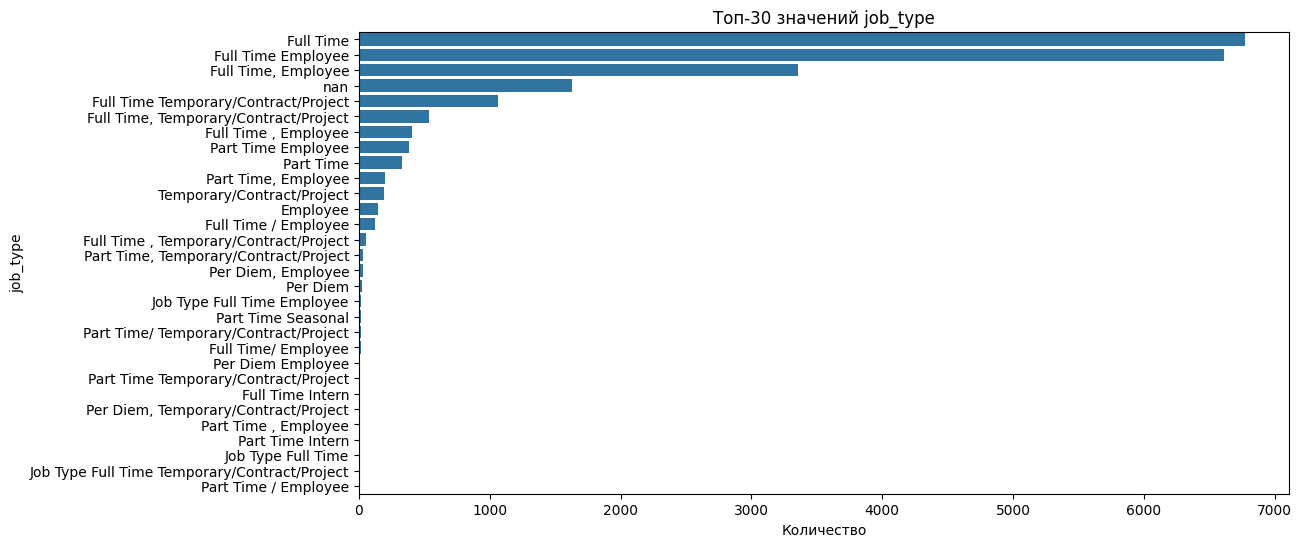

In [ ]:
jt = df['job_type'].astype(str).fillna("").str.strip()

# Посмотрим уникальные значения и частоты
jt_counts = jt.value_counts().head(30).reset_index()
jt_counts.columns = ['job_type','count']
display(jt_counts)

plt.figure(figsize=(12,6))
sns.barplot(data=jt_counts, y='job_type', x='count')
plt.title("Топ-30 значений job_type")
plt.xlabel("Количество")
plt.ylabel("job_type")
plt.show()


Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
def normalize_job_type(s):
    s = str(s).strip()
    s = re.sub(r'\s+', ' ', s)
    s = s.replace("Full Time Employee", "Full Time, Employee")
    s = s.replace("Full Time", "Full Time")
    s = s.replace("Part Time", "Part Time")
    s = s.replace("Per Diem", "Per Diem")
    # унификация разделителей
    s = s.replace("/", ",")
    s = s.replace(";", ",")
    s = re.sub(r'\s*,\s*', ', ', s)
    return s

df['job_type_norm'] = df['job_type'].apply(normalize_job_type)

display(df[['job_type','job_type_norm']].sample(10, random_state=3))


,job_type,job_type_norm
11210,NaN,nan
17950,NaN,nan
15615,"Full Time, Employee","Full Time, Employee"
10104,Full Time,Full Time
5504,"Full Time , Employee","Full Time, Employee"
15917,NaN,nan
15260,"Full Time, Temporary/Contract/Project","Full Time, Temporary, Contract, Project"
4127,Full Time Employee,"Full Time, Employee"
2374,Full Time Temporary/Contract/Project,"Full Time Temporary, Contract, Project"
18759,Part Time,Part Time


Столбец `job_type` состоит из двух частей: "полнота" занятости (`Full Time`, `Part Time`, `Per Diem`) и "тип" занятости (`Employee`, `Intern`). Кроме того, встречаются и неполные записи.

Задание:
1. Написать одно или несколько регулярных выражений для разделения столбца `job_type` на два: `полнота занятости`, `тип занятости`.
2. Если данные о полноте отсутствуют, внесите значение `Full Time`.
Если отсутствуют данные о типе – внесите `Employee`.
3. Постройте столбчатую диаграмму со стековой группировкой для полноты и типа занятости. Сделайте выводы.

,job_type,job_type_norm,employment_fullness,employment_kind
1104,"Full Time, Employee","Full Time, Employee",Full Time,Employee
21977,Full Time Employee,"Full Time, Employee",Full Time,Employee
1933,Full Time Employee,"Full Time, Employee",Full Time,Employee
10839,Full Time,Full Time,Full Time,Employee
7213,Full Time Employee,"Full Time, Employee",Full Time,Employee
12981,Full Time,Full Time,Full Time,Employee
10262,Full Time,Full Time,Full Time,Employee
11051,Full Time Employee,"Full Time, Employee",Full Time,Employee
13854,Full Time,Full Time,Full Time,Employee
2493,"Full Time, Employee","Full Time, Employee",Full Time,Employee


employment_kind,employment_fullness,Employee,Intern
0,Full Time,20935,5
1,Part Time,990,3
2,Per Diem,67,0


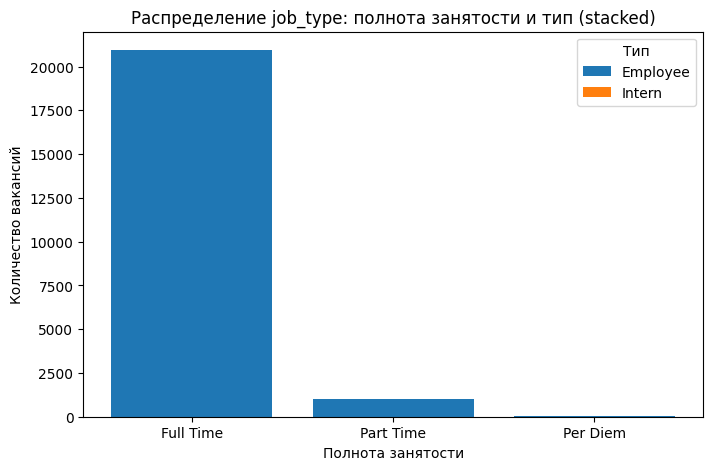

In [ ]:
# Регулярки на полноту и тип
p_full = re.compile(r'(?i)\b(Full Time|Part Time|Per Diem)\b')
p_kind = re.compile(r'(?i)\b(Employee|Intern)\b')

def split_job_type(s):
    s0 = str(s)
    m1 = p_full.search(s0)
    m2 = p_kind.search(s0)

    full = m1.group(1).title() if m1 else "Full Time"
    kind = m2.group(1).title() if m2 else "Employee"
    return full, kind

df[['employment_fullness','employment_kind']] = df['job_type_norm'].apply(lambda x: pd.Series(split_job_type(x)))

# Проверка
display(df[['job_type','job_type_norm','employment_fullness','employment_kind']].sample(15, random_state=5))

# Стековая диаграмма (count)
ct = pd.crosstab(df['employment_fullness'], df['employment_kind']).reset_index()
display(ct)

ct_melt = ct.melt(id_vars='employment_fullness', var_name='employment_kind', value_name='count')

plt.figure(figsize=(8,5))
bottom = None
for kind in ct.columns[1:]:
    vals = ct[kind].values
    if bottom is None:
        plt.bar(ct['employment_fullness'], vals, label=kind)
        bottom = vals
    else:
        plt.bar(ct['employment_fullness'], vals, bottom=bottom, label=kind)
        bottom = bottom + vals

plt.title("Распределение job_type: полнота занятости и тип (stacked)")
plt.xlabel("Полнота занятости")
plt.ylabel("Количество вакансий")
plt.legend(title="Тип")
plt.show()


# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения всех заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой решение задачи на обработку данных лабораторной работы, меньшее по объему, но сопоставимое по сложности тем заданиям, которые требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. В столбце `sector` часто представлены данные из столбца `organization` и наоборот. Устраните эту проблему.
2. В столбце `job_title` часто можно частично или полностью встретить указание местоположения организации. Сравните, совпадают ли в таких случаях данные с тем, что указано в столбцах `город`, `код штата`, `почтовый индекс`. Если в этих трех столбцах данные отсутствуют, заполните их данными из столбца `job_title`.
3. Практически во всех столбцах датасета вместо соответствующих названию данных иногда встречается текст из `job_description`. Найдите такие столбцы и записи с описанием вакансии в них. Покажите на столбчатой диаграмме, в каких столбцах и в каком количестве находится информация из столбца `job_description`.

In [ ]:
# Выполнение дополнительного задания №1

df_fix = df.copy()

# Признаки того, что в sector лежит название организации:
# - длинный текст
# - содержит Inc, LLC, Ltd, Corp, Company и т.п.
org_pattern = re.compile(
    r'\b(inc|llc|ltd|corp|corporation|company|co\.|gmbh|plc)\b',
    re.IGNORECASE
)

def looks_like_org(text):
    if pd.isna(text):
        return False
    text = str(text)
    return (
        len(text) > 30 or           # слишком длинно для отрасли
        bool(org_pattern.search(text))
    )

# Маска: sector выглядит как organization
mask_sector_is_org = df_fix['sector'].apply(looks_like_org)

print("Записей, где sector похож на organization:", mask_sector_is_org.sum())

# Если organization пусто — переносим туда значение из sector
fill_org_mask = mask_sector_is_org & df_fix['organization'].isna()
df_fix.loc[fill_org_mask, 'organization'] = df_fix.loc[fill_org_mask, 'sector']

print("Из них перенесено в organization:", fill_org_mask.sum())

# Очищаем sector в этих строках
df_fix.loc[mask_sector_is_org, 'sector'] = np.nan

# Проверка результата
display(
    df_fix.loc[mask_sector_is_org,
               ['organization', 'sector']]
    .sample(min(10, mask_sector_is_org.sum()), random_state=42)
)

print("После очистки:")
print("Пустых sector:", df_fix['sector'].isna().sum())
print("Пустых organization:", df_fix['organization'].isna().sum())


Записей, где sector похож на organization: 3534
Из них перенесено в organization: 1018


,organization,sector
2881,Computer/Network SecurityGeneral/Other: IT/Sof...,NaN
14559,Installation/Maintenance/Repair,NaN
15420,Manufacturing/Production/Operations,NaN
12085,Manager (Manager/Supervisor of Staff),NaN
2686,General/Other: IT/Software Development,NaN
10337,Manufacturing/Production/Operations,NaN
15060,Manager (Manager/Supervisor of Staff),NaN
20705,Metals and MineralsConstruction - Industrial F...,NaN
1741,Automotive Sales and Repair Services,NaN
9846,Installation/Maintenance/Repair,NaN


После очистки:
Пустых sector: 8728
Пустых organization: 5849


# Дополнительные материалы

1. DAMA-DMBOK: Свод знаний по управлению данными: Второе издание / DAMA International; [пер. с англ.]. – Москва: ООО "Олимп-Бизнес", 2021. – 828 с.
2. Макгрегор, С. Обработка данных на Python: Data Wrangling и Data Quality: [Текст] / С. Макгрегор. – Москва: БХВ, 2024. – 432 с.